In [1]:
import itertools
import json
import os
from random import sample

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics

from utils import data_utils, shape_utils

import importlib
importlib.reload(data_utils)

RUN_FOLDER = "../results/throwaway/"
SEQ_MODELS = ['AVG_SEQ',"PERSISTENT",'RNN_BASE','RNN']

In [2]:
# kcm_deeptte_results = data_utils.extract_deeptte_results("Seattle", RUN_FOLDER, "kcm/")
# atb_deeptte_results = data_utils.extract_deeptte_results("Trondheim", RUN_FOLDER, "atb/")
# kcm_deeptte_result_df = kcm_deeptte_results[kcm_deeptte_results['Loss Set']=="test"][['Model','City','Fold','MAPE','RMSE','MAE']].copy()
# atb_deeptte_result_df = atb_deeptte_results[atb_deeptte_results['Loss Set']=="test"][['Model','City','Fold','MAPE','RMSE','MAE']].copy()

In [3]:
kcm_model_results = data_utils.load_pkl(RUN_FOLDER + "kcm/" + "model_results.pkl")
atb_model_results = data_utils.load_pkl(RUN_FOLDER + "atb/" + "model_results.pkl")
kcm_result_df, kcm_loss_df = data_utils.extract_results("Seattle", kcm_model_results)
atb_result_df, atb_loss_df = data_utils.extract_results("Trondheim", atb_model_results)

In [4]:
# performances_df = pd.concat([kcm_result_df, atb_result_df, kcm_deeptte_result_df, atb_deeptte_result_df], axis=0).sort_values(['Model','City','Fold'])
performances_df = pd.concat([kcm_result_df, atb_result_df], axis=0).sort_values(['Model','City','Fold'])
model_curves_df = pd.concat([kcm_loss_df, atb_loss_df], axis=0)

In [5]:
performances_df

,Model,City,Fold,MAPE,RMSE,MAE
0,AVG,Seattle,0,0.34,392.010010,271.140015
7,AVG,Seattle,1,0.34,397.089996,274.130005
14,AVG,Seattle,2,0.34,398.799988,273.850006
21,AVG,Seattle,3,0.34,398.369995,272.859985
28,AVG,Seattle,4,0.33,395.970001,269.429993
...,...,...,...,...,...,...
1,SCH,Trondheim,0,0.45,256.519989,151.559998
8,SCH,Trondheim,1,0.42,257.480011,146.089996
15,SCH,Trondheim,2,0.44,328.630005,158.300003
22,SCH,Trondheim,3,0.43,191.210007,141.949997


In [6]:
# fig, axes = plt.subplots(1,1)
# fig.set_figheight(4)
# fig.set_figwidth(5)
# sns.lineplot(kcm_deeptte_results, x="Epoch", y="MAPE", ax=axes)
# fig.suptitle('KCM DeepTTE Training Loss (only validation curve)', fontsize=16)
# fig.tight_layout()
# plt.savefig("../plots/model_curves_deeptte_kcm.png", dpi=1800, bbox_inches='tight')

In [7]:
# plot_data = atb_deeptte_results[atb_deeptte_results['Loss Set']!="test"]
# fig, axes = plt.subplots(1,1)
# fig.set_figheight(4)
# fig.set_figwidth(5)
# sns.lineplot(plot_data, x="Epoch", y="MAPE", ax=axes)
# fig.suptitle('AtB DeepTTE Training Loss (only validation curve)', fontsize=16)
# fig.tight_layout()
# plt.savefig("../plots/model_curves_deeptte_atb.png", dpi=1800, bbox_inches='tight')

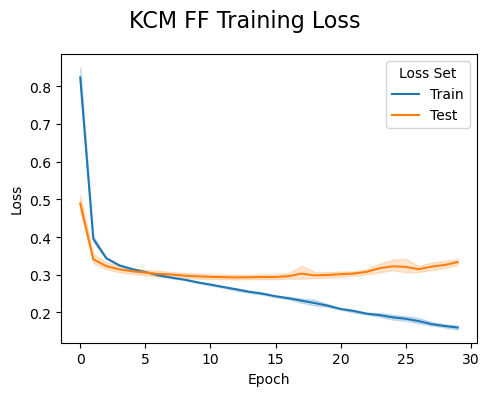

In [8]:
plot_data = model_curves_df[model_curves_df['City']=="Seattle"]
plot_data = plot_data[plot_data['Model']=='FF']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('KCM FF Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_ff_kcm.png", dpi=1800, bbox_inches='tight')

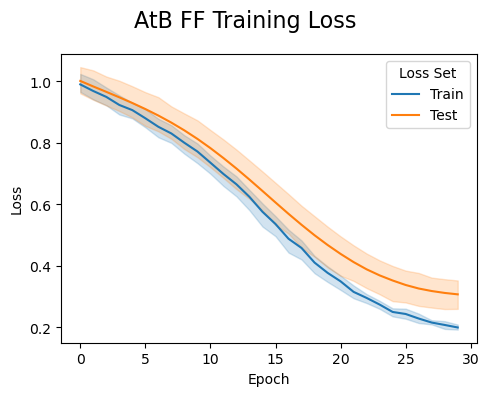

In [9]:
plot_data = model_curves_df[model_curves_df['City']=="Trondheim"]
plot_data = plot_data[plot_data['Model']=='FF']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('AtB FF Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_ff_atb.png", dpi=1800, bbox_inches='tight')

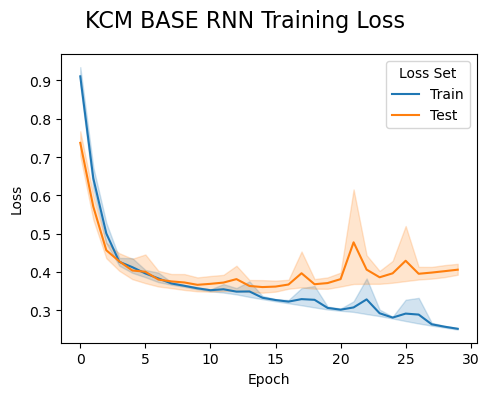

In [10]:
plot_data = model_curves_df[model_curves_df['City']=="Seattle"]
plot_data = plot_data[plot_data['Model']=='RNN_BASE']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('KCM BASE RNN Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_rnn_base_kcm.png", dpi=1800, bbox_inches='tight')

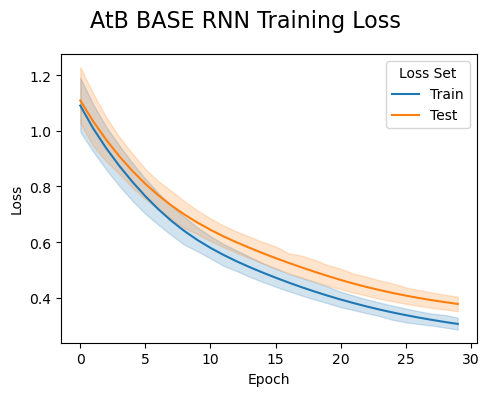

In [11]:
plot_data = model_curves_df[model_curves_df['City']=="Trondheim"]
plot_data = plot_data[plot_data['Model']=='RNN_BASE']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('AtB BASE RNN Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_rnn_base_atb.png", dpi=1800, bbox_inches='tight')

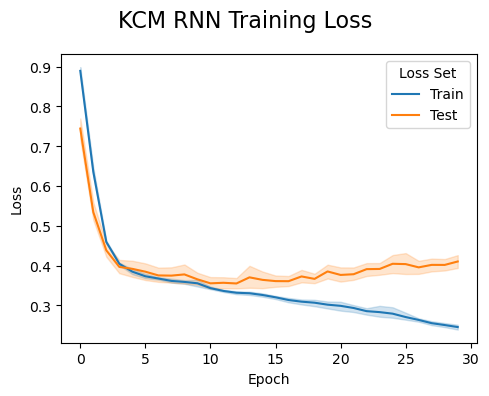

In [12]:
plot_data = model_curves_df[model_curves_df['City']=="Seattle"]
plot_data = plot_data[plot_data['Model']=='RNN']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('KCM RNN Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_rnn_kcm.png", dpi=1800, bbox_inches='tight')

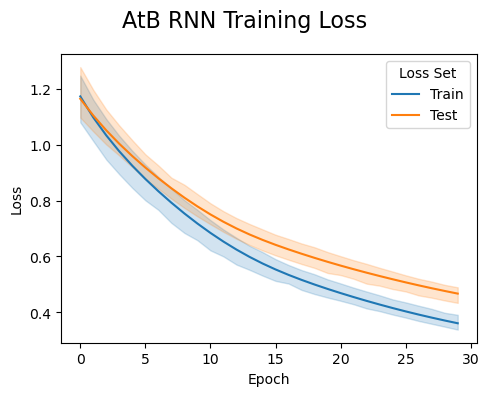

In [13]:
plot_data = model_curves_df[model_curves_df['City']=="Trondheim"]
plot_data = plot_data[plot_data['Model']=='RNN']
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('AtB RNN Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_rnn_atb.png", dpi=1800, bbox_inches='tight')

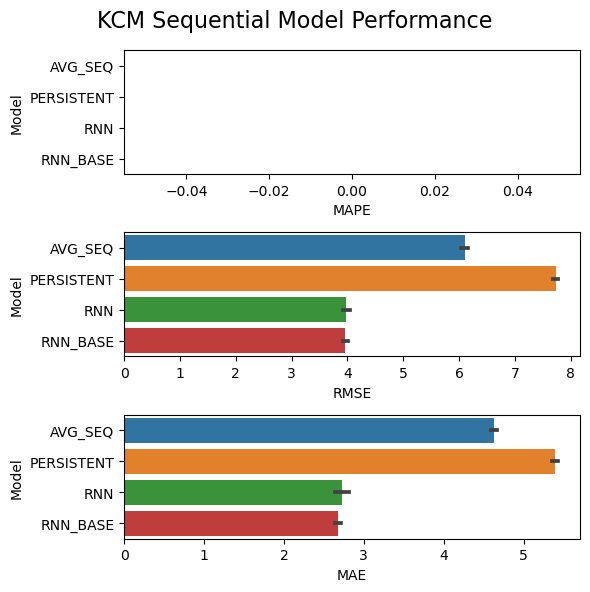

In [14]:
plot_data = performances_df[performances_df['City']=="Seattle"]
plot_data = plot_data[plot_data['Model'].isin(SEQ_MODELS)]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('KCM Sequential Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_seq_kcm.png", dpi=1800, bbox_inches='tight')

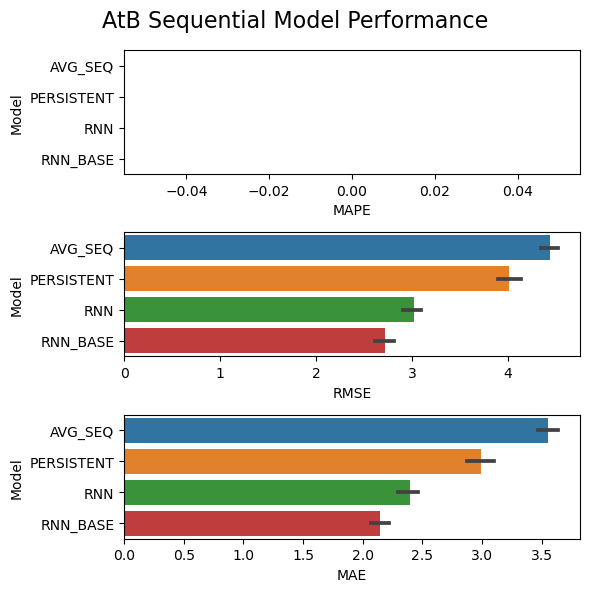

In [15]:
plot_data = performances_df[performances_df['City']=="Trondheim"]
plot_data = plot_data[plot_data['Model'].isin(SEQ_MODELS)]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('AtB Sequential Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_seq_atb.png", dpi=1800, bbox_inches='tight')

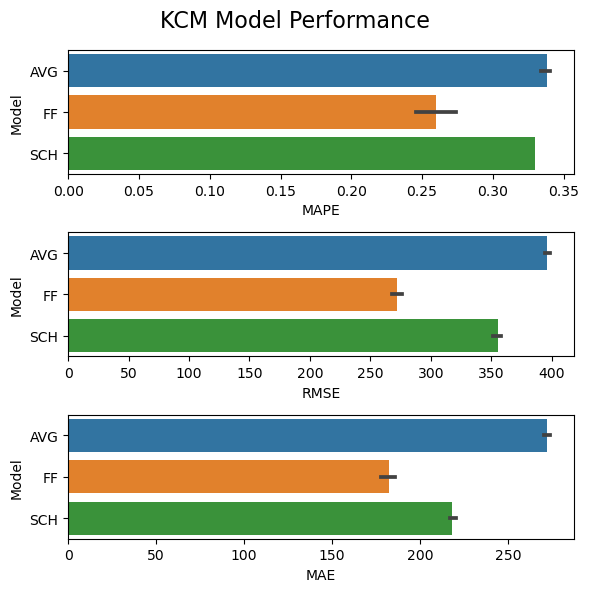

In [16]:
plot_data = performances_df[performances_df['City']=="Seattle"]
plot_data = plot_data[~plot_data['Model'].isin(SEQ_MODELS)]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('KCM Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_kcm.png", dpi=1800, bbox_inches='tight')

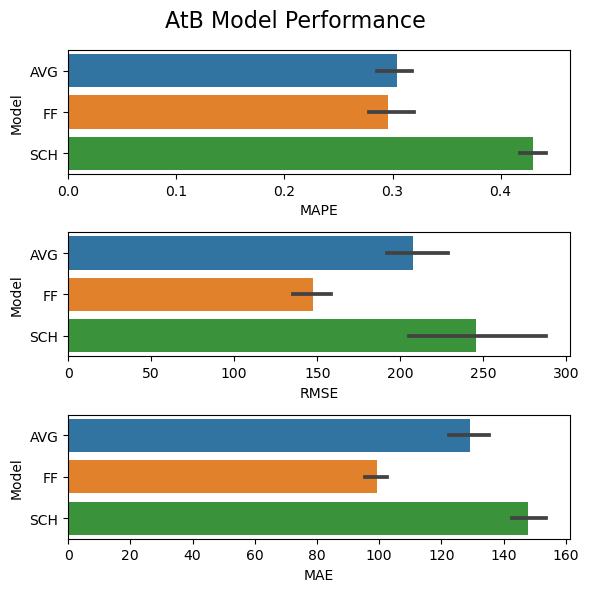

In [17]:
plot_data = performances_df[performances_df['City']=="Trondheim"]
plot_data = plot_data[~plot_data['Model'].isin(SEQ_MODELS)]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('AtB Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_atb.png", dpi=1800, bbox_inches='tight')